
Tree Based Models - Q13 - 18/July
===================================
We are interested in understanding what impacts the mileage of cars. 
400 cars were measured and its data is available in the file 06_Car_mileage.csv. 

https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

1) Train a decision tree and identify the features that impact the mileage of cars. 

     Note that cylinders though numerical can only take specific values, and origin is categorical.

2) How good would the prediction be if we use 300 cars for training and test it on the rest of the data?

3) Are there outliers that influence the result? How can we minimize the impact of outliers?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read and display the data file
df = pd.read_csv('/Users/riteshturlapaty/ai-ml-learning/AccelerateAI/7.DecisionTree/DailyQuiz/06_Car_mileage.csv')
df.head(5)

,cylinders,displacement,hp,weight,acceleration,origin,mpg
0,8,307.0,130,3504,12.0,1,18.0
1,8,350.0,165,3693,11.5,1,15.0
2,8,318.0,150,3436,11.0,1,18.0
3,8,304.0,150,3433,12.0,1,16.0
4,8,302.0,140,3449,10.5,1,17.0


In [3]:
# Get the datatypes of the data frame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   hp            398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   origin        398 non-null    int64  
 6   mpg           398 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [4]:
# Describe the data frame
df.describe()

,cylinders,displacement,weight,acceleration,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,1.572864,23.514573
std,1.701004,104.269838,846.841774,2.757689,0.802055,7.815984
min,3.000000,68.000000,1613.000000,8.000000,1.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,1.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,1.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,2.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,3.000000,46.600000


In [5]:
# Assign to new data frame
car_mileage_data=df

In [6]:
# hp is incorrectly stored as object, lets convert it into numeric
car_mileage_data['hp'] = pd.to_numeric(car_mileage_data['hp'], errors='coerce')
car_mileage_data.dropna(inplace=True)

In [7]:
# Check the origin value after converting into numeric
car_mileage_data['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [8]:
# Here origin and cylinders are both considered as categorical
car_mileage_onehot = pd.get_dummies(car_mileage_data, columns=['origin', 'cylinders'])
car_mileage_onehot.head()

,displacement,hp,weight,acceleration,mpg,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,307.0,130.0,3504,12.0,18.0,1,0,0,0,0,0,0,1
1,350.0,165.0,3693,11.5,15.0,1,0,0,0,0,0,0,1
2,318.0,150.0,3436,11.0,18.0,1,0,0,0,0,0,0,1
3,304.0,150.0,3433,12.0,16.0,1,0,0,0,0,0,0,1
4,302.0,140.0,3449,10.5,17.0,1,0,0,0,0,0,0,1


In [9]:
# Prepare X and y
X = car_mileage_onehot.drop('mpg', axis=1)
y = car_mileage_onehot['mpg']

# Initialize the model
clf = DecisionTreeRegressor(random_state=42)

# Fit the model
clf.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [10]:
# feature that impact car mileage
pd.Series(clf.feature_importances_, index=X.columns)

displacement    0.620411
hp              0.210490
weight          0.062547
acceleration    0.080866
origin_1        0.000093
origin_2        0.007862
origin_3        0.004859
cylinders_3     0.000000
cylinders_4     0.000037
cylinders_5     0.001584
cylinders_6     0.011253
cylinders_8     0.000000
dtype: float64

As seen, the top 4 variables that impact car mileage are engine 
1. displacement
2. hp
3. weigh
4. acceleration

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.766, random_state=25)

In [12]:
# Check shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 12)
(300,)
(92, 12)
(92,)


In [13]:
# Initialize the model
clf_after_split = DecisionTreeRegressor(random_state=42)

# Use cross validation
params = {'max_depth':range(1,11), 'min_samples_split':range(10,60,10)}

# Create GridSearchCV object
clf_gs_after_split = GridSearchCV(estimator=clf_after_split, cv=5, param_grid=params)

# Fit
clf_gs_after_split.fit(X_train, y_train)

# Print best params and best score
print(clf_gs_after_split.best_params_)
print(clf_gs_after_split.best_score_)

{'max_depth': 3, 'min_samples_split': 50}
0.7144315314541173


In [14]:
# Check score on test data
clf_gs_after_split.score(X_test, y_test)

0.58824925936856

As seen, there is drastic reduction in the test score of the model.

<AxesSubplot:xlabel='mpg', ylabel='Density'>

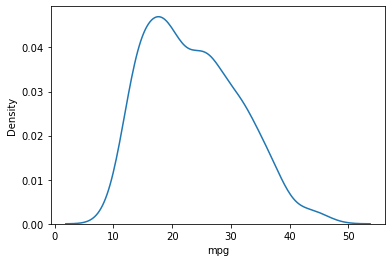

In [15]:
# Lets check distribution of y
sns.kdeplot(y)

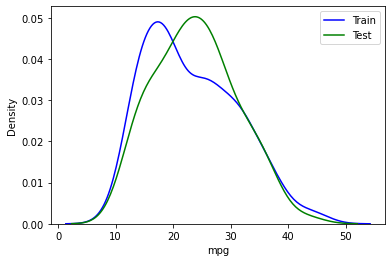

In [16]:
# Check the distribution of y on both train and test set
sns.kdeplot(y_train, color='blue', label='Train')
sns.kdeplot(y_test, color='green', label='Test')
plt.legend()

In [17]:
# Lets check 1 and 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

params = {'min_samples_split' : [5,10,15,20],
          'min_samples_leaf' : [10,15,20],
          'max_depth' : [5,10,15],
          'criterion' : ['mse', 'friedman_mse', 'mae']}

clf_gs = GridSearchCV(DecisionTreeRegressor(), cv=5, param_grid=params)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20]})

In [18]:
clf_gs.best_params_, clf_gs.best_score_

({'criterion': 'mae',
  'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 10},
 0.7334069195260706)

In [19]:
clf_gs.score(X_test, y_test)

0.6922149507908725

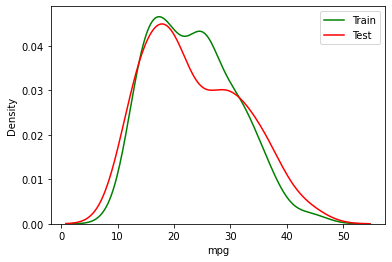

In [20]:
# Lets check the distribution
sns.kdeplot(y_train, color='green', label='Train')
sns.kdeplot(y_test, color='red', label='Test')
plt.legend()
plt.show()

With plot now almost similar, we can say that impact of outliers has been contained to a greater extent